## TSVD - Truncated Singular Value Decomposition
```
FileName: TSVD-v1.ipynb
Creation Date: 12-Jul-2018
Input: Librosa120Sec577FeatsCSVExtract20_v3.gzip
Output: Librosa120Sec577FeatsCSVExtract20_v3_ReducedTSVD.gzip
Runtime: 20 mins
Description: Reduce Features.  from TSVD we derive top Feature list; note data is transformed here
             but we are throwing away this data and using original data; Next top columns from 
             Test file is used to create a new Test file
Version:
    v1: 12-Jul-2018: Initial Version
    v2: 12-Jul-2018: Write transformed data; no feature reduction; only transformation;
                     Use v1 to reduce features and v2 to transform data
```

In [127]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd
import datetime

In [128]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-12 10:44:59


In [129]:
# fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3_ReducedTSVD178"# Train
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract10Test_v3_ReducedTSVD178" # Test -- do not generate this here use feature reduction code
retainVariance = 1.00 # Retain 100% -- this code is only for transformation of data

In [130]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [131]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [132]:
x_data = df.drop('label',axis=1)
y_labels = df['label'].values

In [133]:
x_data.shape

(101814, 178)

In [134]:
y_labels.shape

(101814,)

In [135]:
y_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.00001,random_state=101) # 71351729)

In [137]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
# scaler = sklearn.preprocessing.MinMaxScaler()
# scaler = sklearn.preprocessing.MaxAbsScaler()
# scaler = sklearn.preprocessing.QuantileTransformer()
# scaler = sklearn.preprocessing.Normalizer()

In [138]:
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test  = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


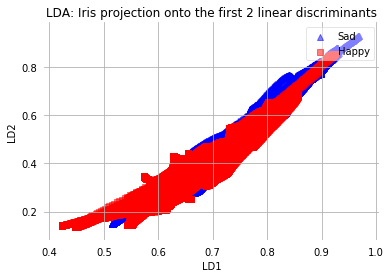

In [139]:
plot_step_lda(x_data.as_matrix(columns=None), y_labels)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


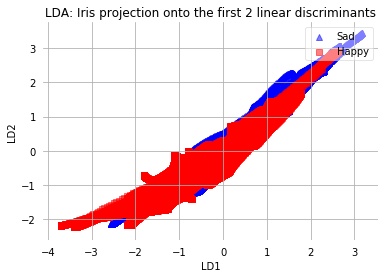

In [140]:
plot_step_lda(X_train.as_matrix(columns=None), y_train)

In [141]:
# Make sparse matrix 
features_sparse = csr_matrix(X_train)

In [142]:
# Create a function
def select_n_components(var_ratio, goal_var):
    # Set initial variance explained so far
    total_variance = 0.0 
    # Set initial number of features 
    n_components = 0 
    # For the explained variance of each feature: 
    for explained_variance in var_ratio:
        # Add the explained variance to the total
        total_variance += explained_variance
        # Add one to the number of components 
        n_components += 1 
        # If we reach our goal level of explained variance 
        if total_variance >= goal_var: 
            # End the loop
            break 
    # Return the number of components
    return n_components

In [143]:
# uses retainVariance
def getFeatCount(retainVariance):
    # Create and run an TSVD with one less than number of features
    tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
    features_tsvd = tsvd.fit(features_sparse)
    
    # List of explained variances
    tsvd_var_ratios = tsvd.explained_variance_ratio_
    
    # Run function 
    n_feats = select_n_components(tsvd_var_ratios, retainVariance)
    print("Number of Features:", n_feats)
    
    return(n_feats)

In [144]:
# n_feats = getFeatCount(retainVariance)
n_feats = len(X_train.columns)

In [145]:
print("Number of Features to be used:", n_feats)

Number of Features to be used: 178


In [146]:
# Create a TSVD
tsvd = TruncatedSVD(n_components=n_feats-1)

In [147]:
# Conduct TSVD on sparse matrix 
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


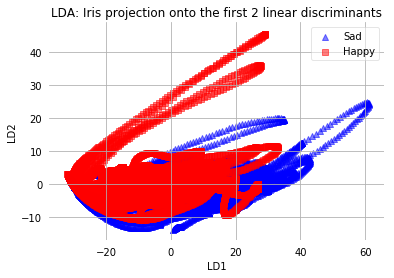

In [148]:
plot_step_lda(features_sparse_tsvd, y_train)

In [149]:
n_feats = tsvd.components_.shape[0]
n_feats

177

In [150]:
loading_scores = pd.Series(tsvd.components_[0])
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_feats = sorted_loading_scores[0:n_feats].index.values
len(top_feats)

177

In [151]:
loading_scores[top_feats][:10]

109    0.086685
118    0.086547
89     0.084374
106    0.084113
66     0.084061
87     0.083867
85     0.083313
110    0.083280
88     0.082905
143    0.082734
dtype: float64

In [152]:
newHeadList = ["f" + str(i) for i in top_feats]

In [153]:
# newHeadList.append("label")

In [154]:
type(features_sparse_tsvd)

numpy.ndarray

In [155]:
features_sparse_tsvd.shape

(101812, 177)

In [156]:
len(newHeadList)

177

In [157]:
import pandas
newDF = pandas.DataFrame(data=features_sparse_tsvd, columns=newHeadList)

In [158]:
newDF["label"] = y_labels[:features_sparse_tsvd.shape[0]]

In [159]:
newDF.columns

Index(['f109', 'f118', 'f89', 'f106', 'f66', 'f87', 'f85', 'f110', 'f88',
       'f143',
       ...
       'f14', 'f12', 'f18', 'f37', 'f47', 'f7', 'f16', 'f48', 'f9', 'label'],
      dtype='object', length=178)

In [160]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedTSVD_2" + str(n_feats) + ".gzip"), sep=",", index=False, 
             header=newDF.columns, compression='gzip')

In [161]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-12 10:47:57
